
# Import libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Dataset - https://archive.ics.uci.edu/ml/datasets/Air+Quality

Dataset zawiera odpowiedzi wieloczujnikowego urządzenia gazowego rozmieszczonego w terenie we włoskim mieście. Rejestrowane są średnie godzinowe odpowiedzi wraz z odniesieniami stężeń gazów z certyfikowanego analizatora.

Brakujące wartości są oznaczane wartością -200.

## Loading Data

In [ ]:
# Load data from the Excel file
data = pd.read_excel('AirQualityUCI.xlsx')

# Display the first 5 rows
data.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


- Date: The date (YYYY-MM-DD) when the air quality measurements were taken.
- Time: The time (HH.MM.SS) when the air quality measurements were taken.
- CO(GT): True hourly averaged concentration of CO (Carbon Monoxide) in mg/m^3 (reference analyzer).
- PT08.S1(CO): PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted).
- NMHC(GT): True hourly averaged overall Non-Methane Hydrocarbons concentration in microg/m^3 (reference analyzer).
- C6H6(GT): True hourly averaged Benzene concentration in microg/m^3 (reference analyzer).
- PT08.S2(NMHC): PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted).
- NOx(GT): True hourly averaged NOx concentration in ppb (reference analyzer).
- PT08.S3(NOx): PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted).
- NO2(GT): True hourly averaged NO2 concentration in microg/m^3 (reference analyzer).
- PT08.S4(NO2): PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted).
- PT08.S5(O3): PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted).
- T: Temperature in °C.
- RH: Relative Humidity in %.
- AH: Absolute Humidity in g/m^3.

## Exploratory Data Analysis

In [ ]:
# Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [ ]:
# Basic statistics of the dataset
data.describe().T

In [ ]:
# Check for missing values
data.isnull().sum()


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

# Create DateTime column

In [ ]:
#DateTime - nowa kolumna
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

In [ ]:
data['DateTime']

0      2004-03-10 18:00:00
1      2004-03-10 19:00:00
2      2004-03-10 20:00:00
3      2004-03-10 21:00:00
4      2004-03-10 22:00:00
               ...        
9352   2005-04-04 10:00:00
9353   2005-04-04 11:00:00
9354   2005-04-04 12:00:00
9355   2005-04-04 13:00:00
9356   2005-04-04 14:00:00
Name: DateTime, Length: 9357, dtype: datetime64[ns]

In [ ]:
data['DateTime'].loc[9352] - data['DateTime'].loc[0] 

Timedelta('389 days 16:00:00')

In [ ]:
(data['DateTime'].loc[9352] - data['DateTime'].loc[0]).days

389

In [ ]:
# Count the difference in seconds

In [ ]:
data.info()

# Data Cleaning

In [ ]:
import numpy as np

# Replace -200 with NaN (missing value)
data = data.replace(-200, np.nan)


In [ ]:
# Check for missing values
data.isnull().sum()


Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [ ]:
data.shape

(9357, 15)

In [ ]:
#Usun kolumne 'NMHC(GT)'

In [ ]:
# data.fillna(0)

In [ ]:
data = data.fillna(data.mean())

# Check for missing values again
print(data.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


<ipython-input-59-de74b122d2d7>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data = data.fillna(data.mean())
<ipython-input-59-de74b122d2d7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


## Correlations between variables
Dependencies between variables

In [ ]:
# Calculate the correlation matrix
corr_matrix = data.corr()
corr_matrix

<ipython-input-19-ebba4916f2d3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.773394,0.289975,0.812392,0.795586,0.762297,-0.613870,0.646528,0.558225,0.759027,0.020260,0.043204,0.043273
PT08.S1(CO),0.773394,1.000000,0.278288,0.883821,0.892972,0.615974,-0.771918,0.562997,0.682874,0.899326,0.048628,0.114607,0.135323
NMHC(GT),0.289975,0.278288,1.000000,0.281923,0.279751,0.098185,-0.261985,0.156549,0.232983,0.240594,0.066809,-0.052794,0.037173
C6H6(GT),0.812392,0.883821,0.281923,1.000000,0.981962,0.616880,-0.735711,0.536178,0.765717,0.865727,0.198891,-0.061643,0.167909
PT08.S2(NMHC),0.795586,0.892972,0.279751,0.981962,1.000000,0.601812,-0.796687,0.561421,0.777235,0.880590,0.241330,-0.090352,0.186906
NOx(GT),0.762297,0.615974,0.098185,0.616880,0.601812,1.000000,-0.563259,0.763133,0.205526,0.688214,-0.235657,0.192578,-0.126831
PT08.S3(NOx),-0.613870,-0.771918,-0.261985,-0.735711,-0.796687,-0.563259,1.000000,-0.569535,-0.538460,-0.796554,-0.145133,-0.056730,-0.232021
NO2(GT),0.646528,0.562997,0.156549,0.536178,0.561421,0.763133,-0.569535,1.000000,0.140940,0.629564,-0.165317,-0.080645,-0.291200
PT08.S4(NO2),0.558225,0.682874,0.232983,0.765717,0.777235,0.205526,-0.538460,0.140940,1.000000,0.591137,0.561333,-0.032188,0.629644
PT08.S5(O3),0.759027,0.899326,0.240594,0.865727,0.880590,0.688214,-0.796554,0.629564,0.591137,1.000000,-0.027193,0.124952,0.070738


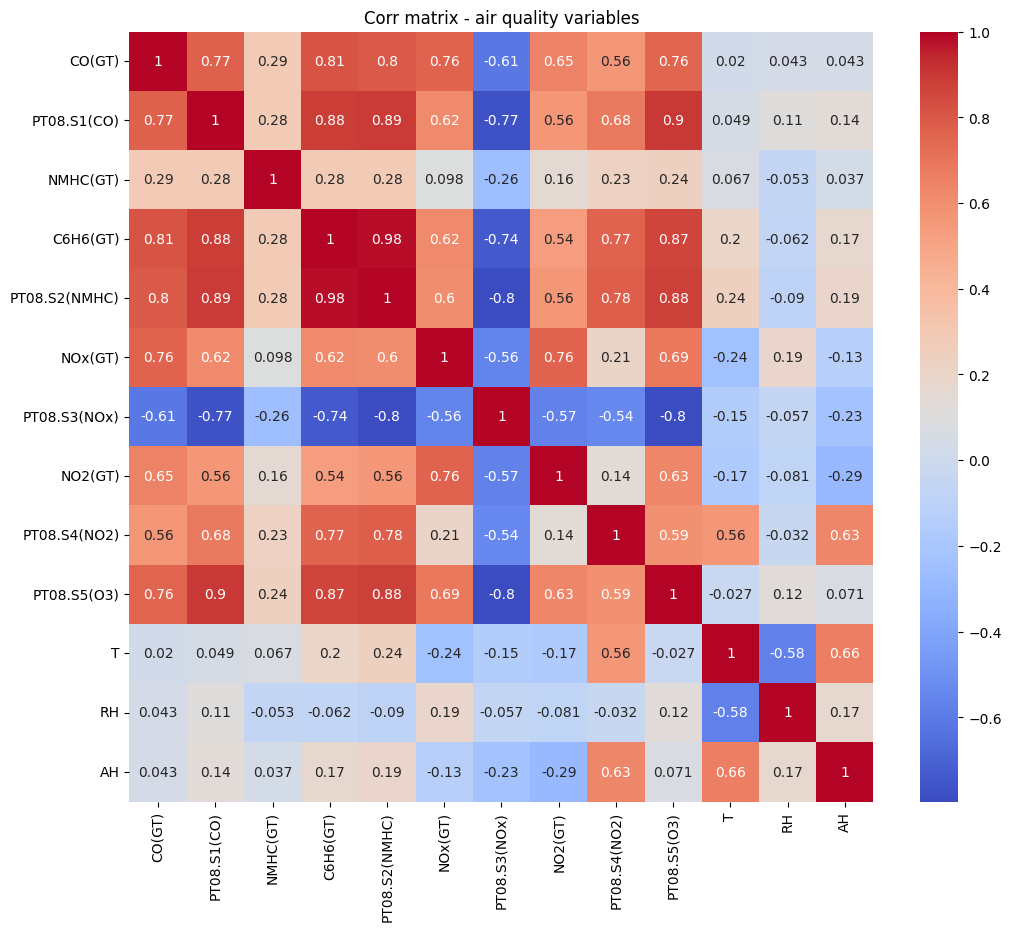

In [ ]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Corr matrix - air quality variables')
plt.show()


In [ ]:
# Ktora z kolumn jest najbardziej zalezna?
# Usun te kolumne

## Add new column with week day

In [ ]:
data['WeekDay'] = data['Date'].dt.day_name()

In [ ]:
data[['WeekDay']]

In [ ]:
data['WeekDay'].value_counts()

Thursday     1344
Friday       1344
Saturday     1344
Sunday       1344
Monday       1335
Wednesday    1326
Tuesday      1320
Name: WeekDay, dtype: int64

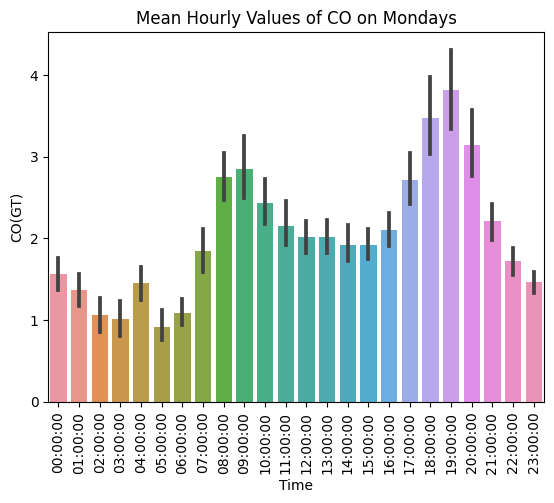

In [ ]:
#Creating new dataframe with only monday data

data_mon = data[data['WeekDay'] == 'Monday']

#Plotting the mean hourly value of CO on Mondays

sns.barplot(x='Time',y='CO(GT)', data=data_mon.sort_values('Time'))
plt.title('Mean Hourly Values of CO on Mondays')
plt.xticks(rotation=90)
plt.show()


Wniosek: szczytowe wartości 8-9, 18-20

In [ ]:
# Stworz DataFrame opisujacy tylko Niedziele, sprawdz jaka bedzie godzinowa dystrybucja CO 

## Distribution of target variable (CO concentration)

In [ ]:
# Alternatively
# Visualize the distribution of CO concentration
plt.figure(figsize=(10, 5))
data['CO(GT)'].hist(bins=30)
plt.title('CO distribution')
plt.xlabel('CO Concentration [mg/m^3]')
plt.show()


In [ ]:
# Visualize the distribution of CO concentration
plt.figure(figsize=(10, 5))
sns.histplot(data['CO(GT)'], bins=30)
plt.title('CO distribution')
plt.xlabel('CO Concentration [mg/m^3]')
plt.show()


In [ ]:
# Sprawdz jak wyglada dystrybucja innych kolumn

## Scatter plots of CO concentration vs other variables

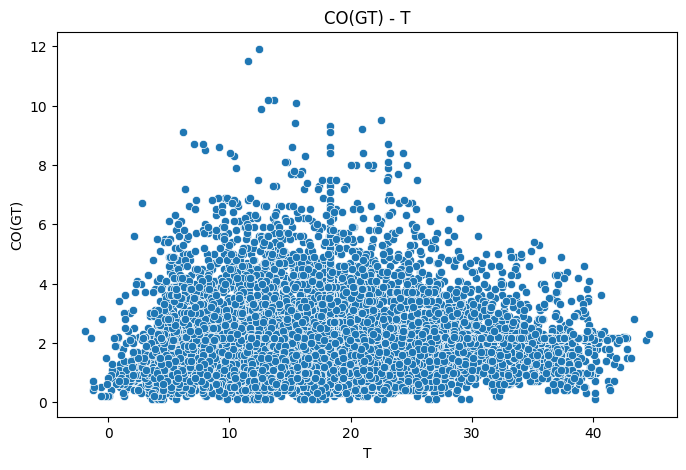

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='T', y='CO(GT)')
plt.title(f'CO(GT) - T')
plt.xlabel('T')
plt.ylabel('CO(GT)')
plt.show()

In [ ]:
# Sprawdz zaleznosci dla innych column

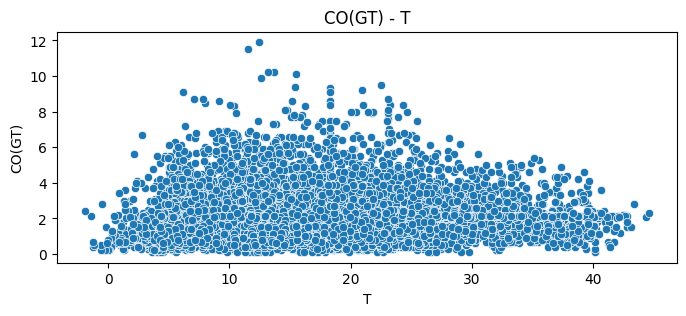

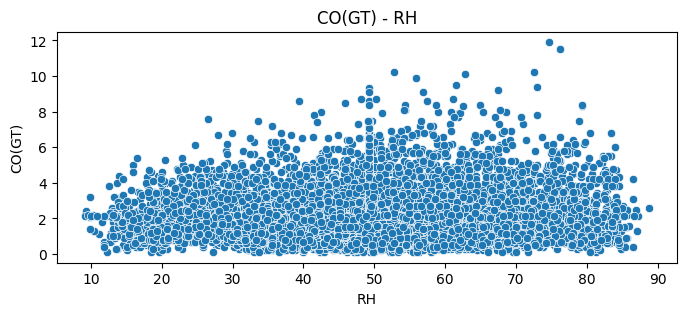

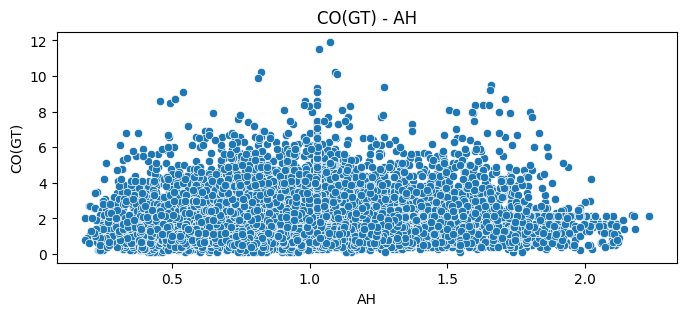

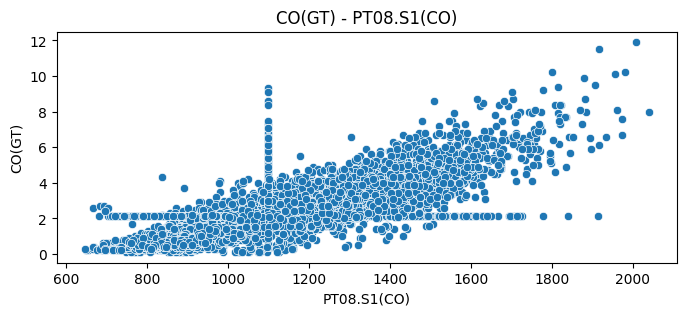

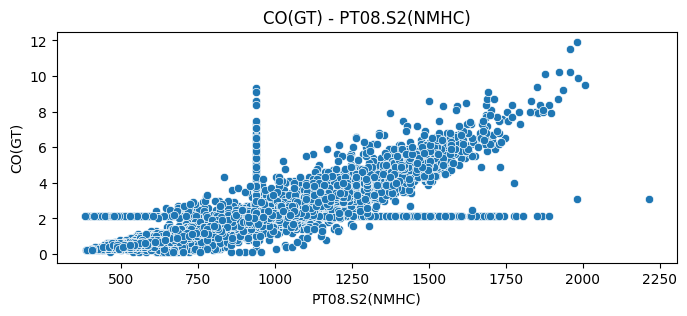

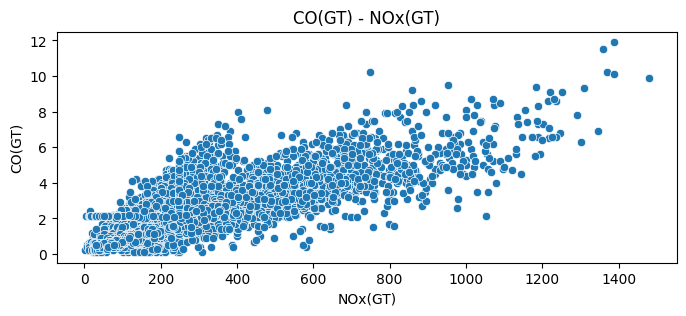

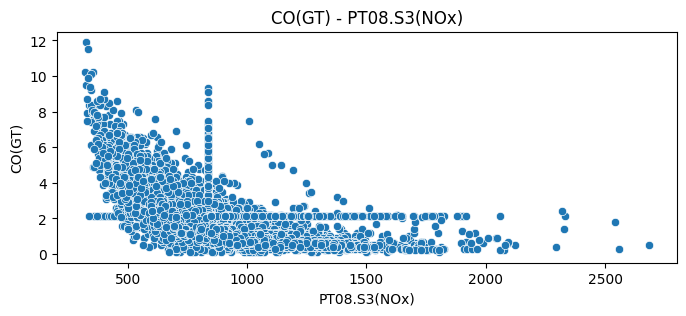

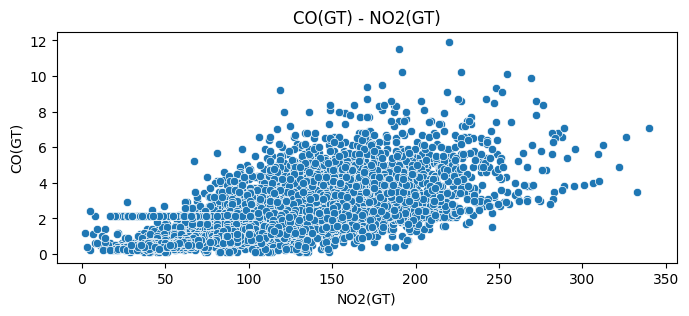

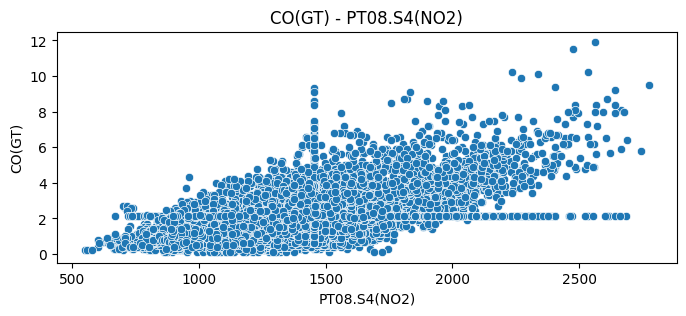

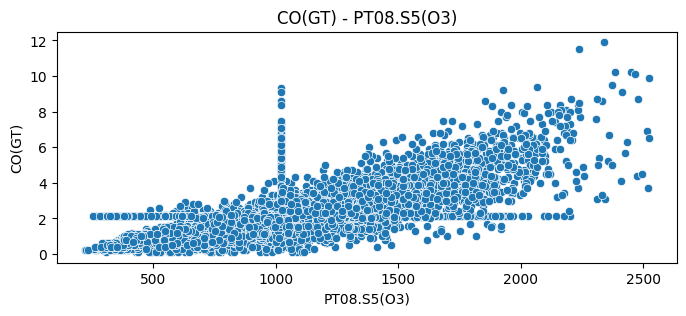

In [ ]:
# Function to create scatter plots
def scatter_plot(data, x, y='CO(GT)'):
    plt.figure(figsize=(8, 3))
    sns.scatterplot(data=data, x=x, y=y)
    plt.title(f'{y} - {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Scatter plots for features
scatter_plot(data, 'T')
scatter_plot(data, 'RH')
scatter_plot(data, 'AH')
scatter_plot(data, 'PT08.S1(CO)')
scatter_plot(data, 'PT08.S2(NMHC)')
scatter_plot(data, 'NOx(GT)')
scatter_plot(data, 'PT08.S3(NOx)')
scatter_plot(data, 'NO2(GT)')
scatter_plot(data, 'PT08.S4(NO2)')
scatter_plot(data, 'PT08.S5(O3)')



## Distribution of other variables

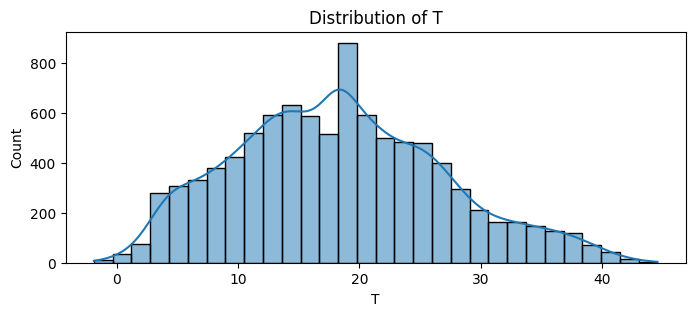

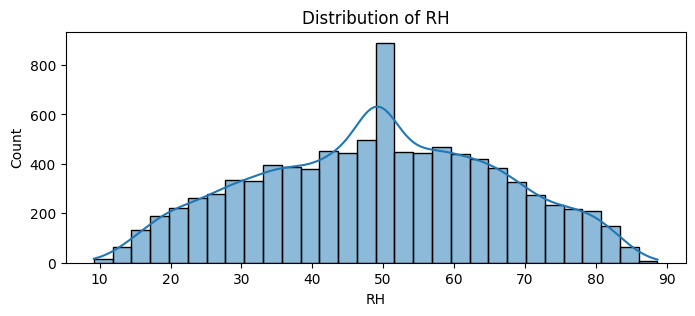

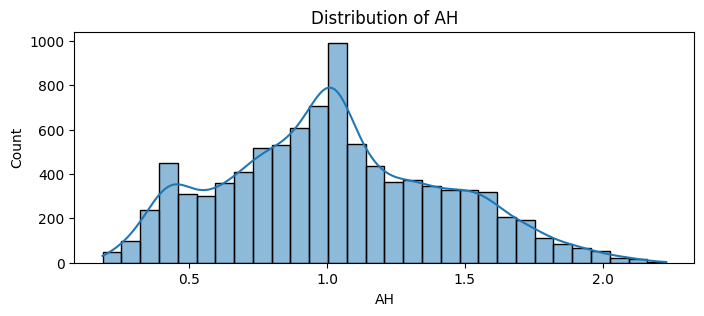

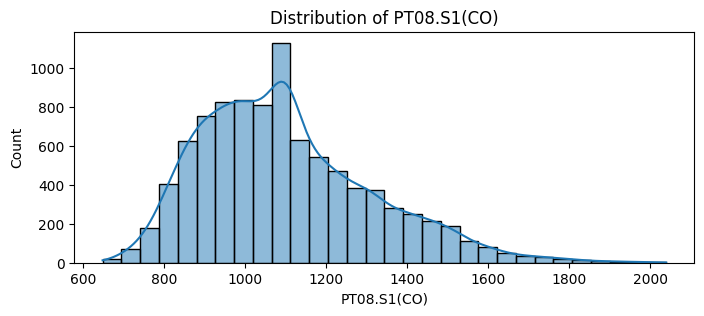

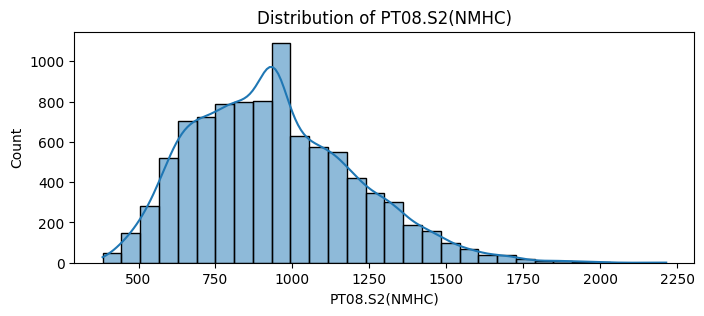

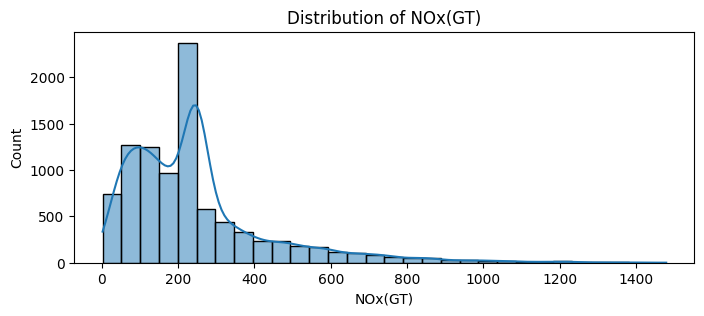

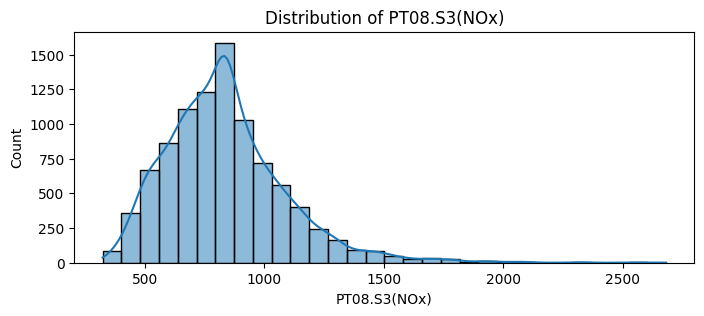

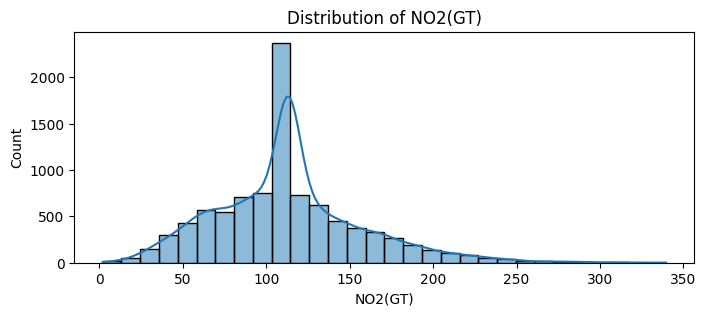

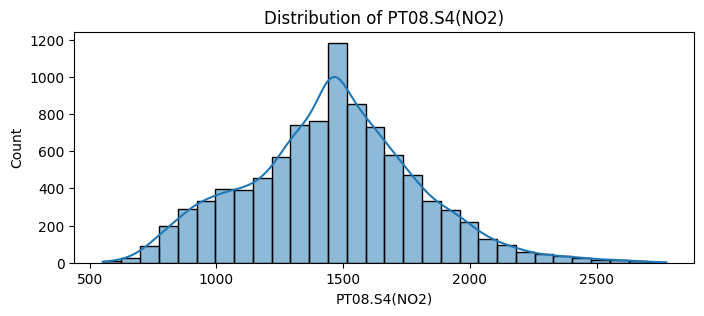

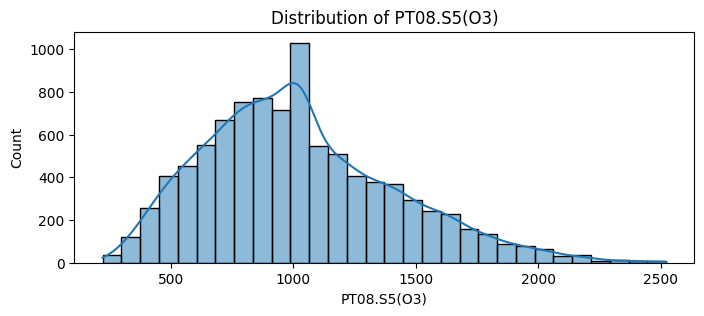

In [ ]:
# Function to create histograms
def histogram(data, column):
    plt.figure(figsize=(8, 3))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

# Histograms for features
histogram(data, 'T')
histogram(data, 'RH')
histogram(data, 'AH')
histogram(data, 'PT08.S1(CO)')
histogram(data, 'PT08.S2(NMHC)')
histogram(data, 'NOx(GT)')
histogram(data, 'PT08.S3(NOx)')
histogram(data, 'NO2(GT)')
histogram(data, 'PT08.S4(NO2)')
histogram(data, 'PT08.S5(O3)')



In [ ]:
# Visualize pairwise relationships
selected_columns = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH', 'PT08.S1(CO)']
sns.pairplot(data[selected_columns])
plt.show()


In [ ]:
data.describe()

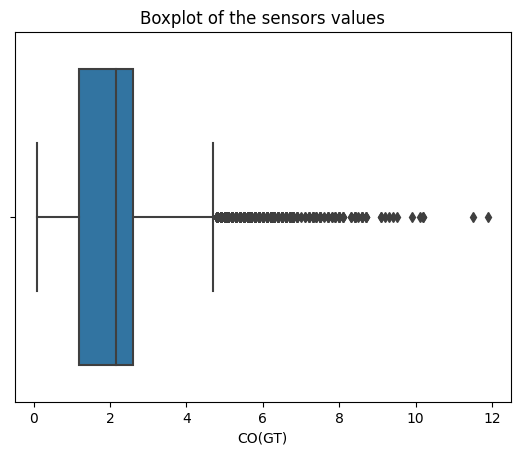

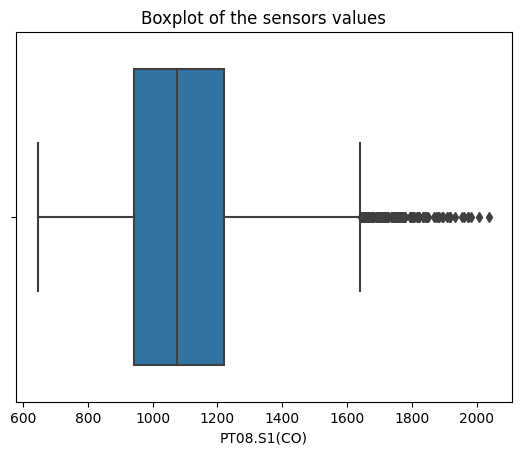

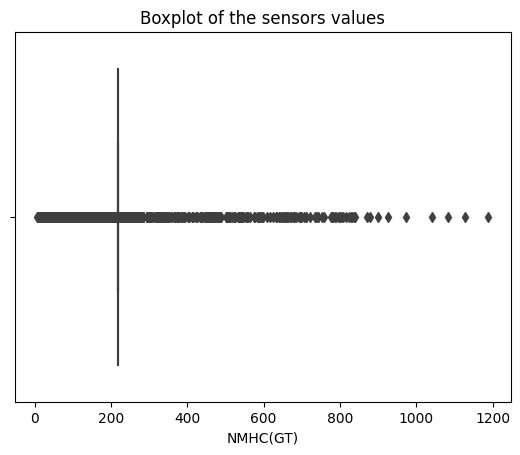

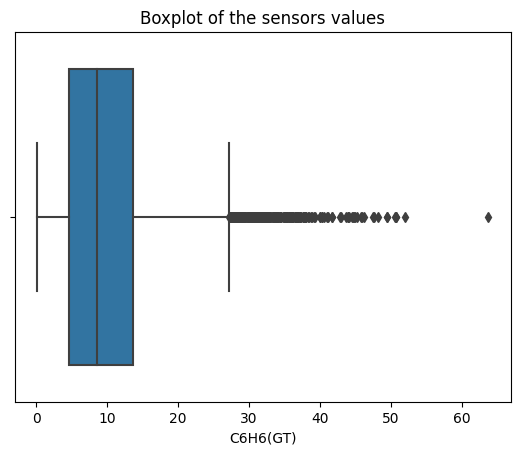

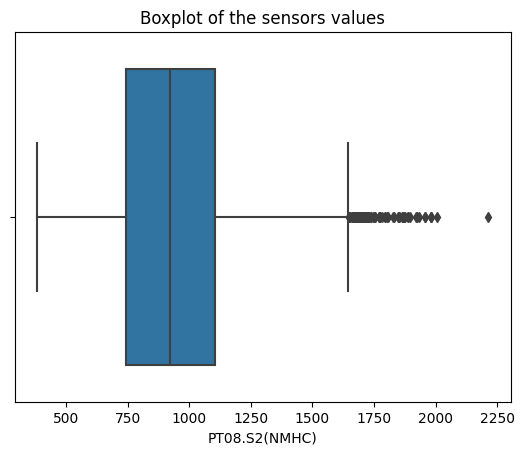

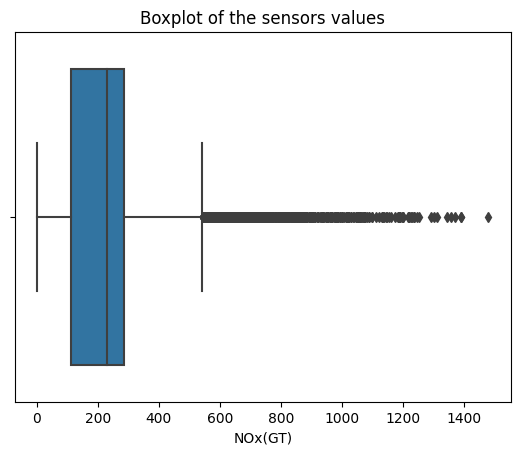

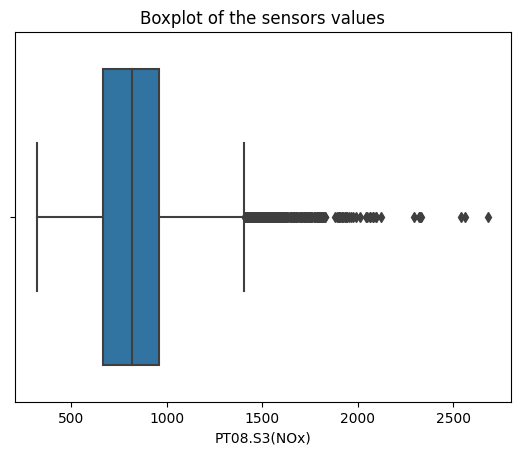

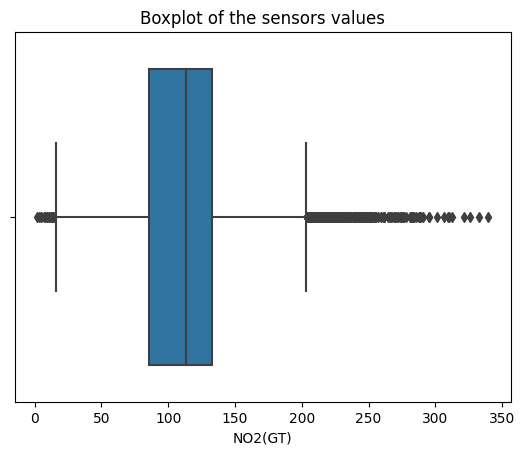

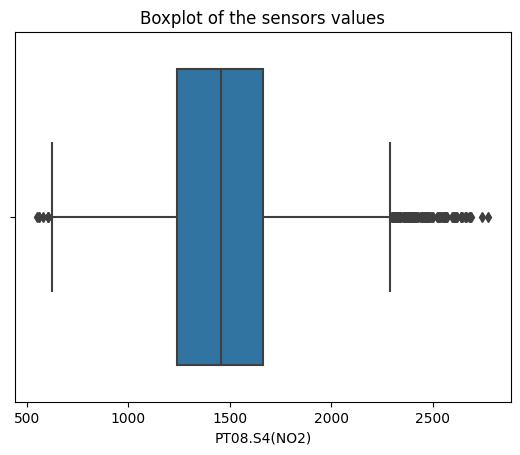

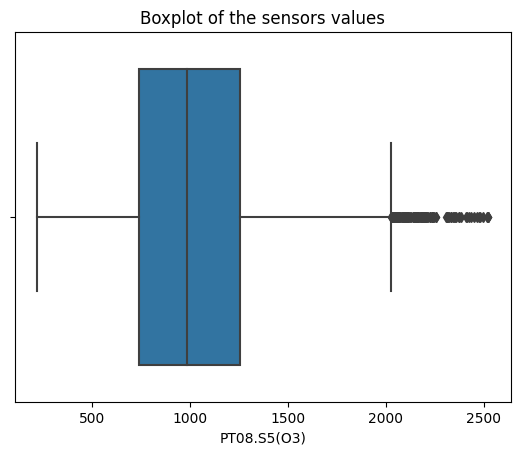

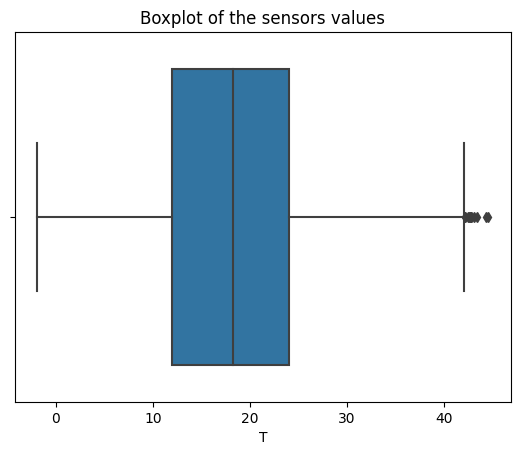

In [ ]:
# Boxplot

for i in data.columns[2:13]:
    sns.boxplot(x=data[i])
    plt.title('Boxplot of the sensors values')
    plt.show()

<Axes: >

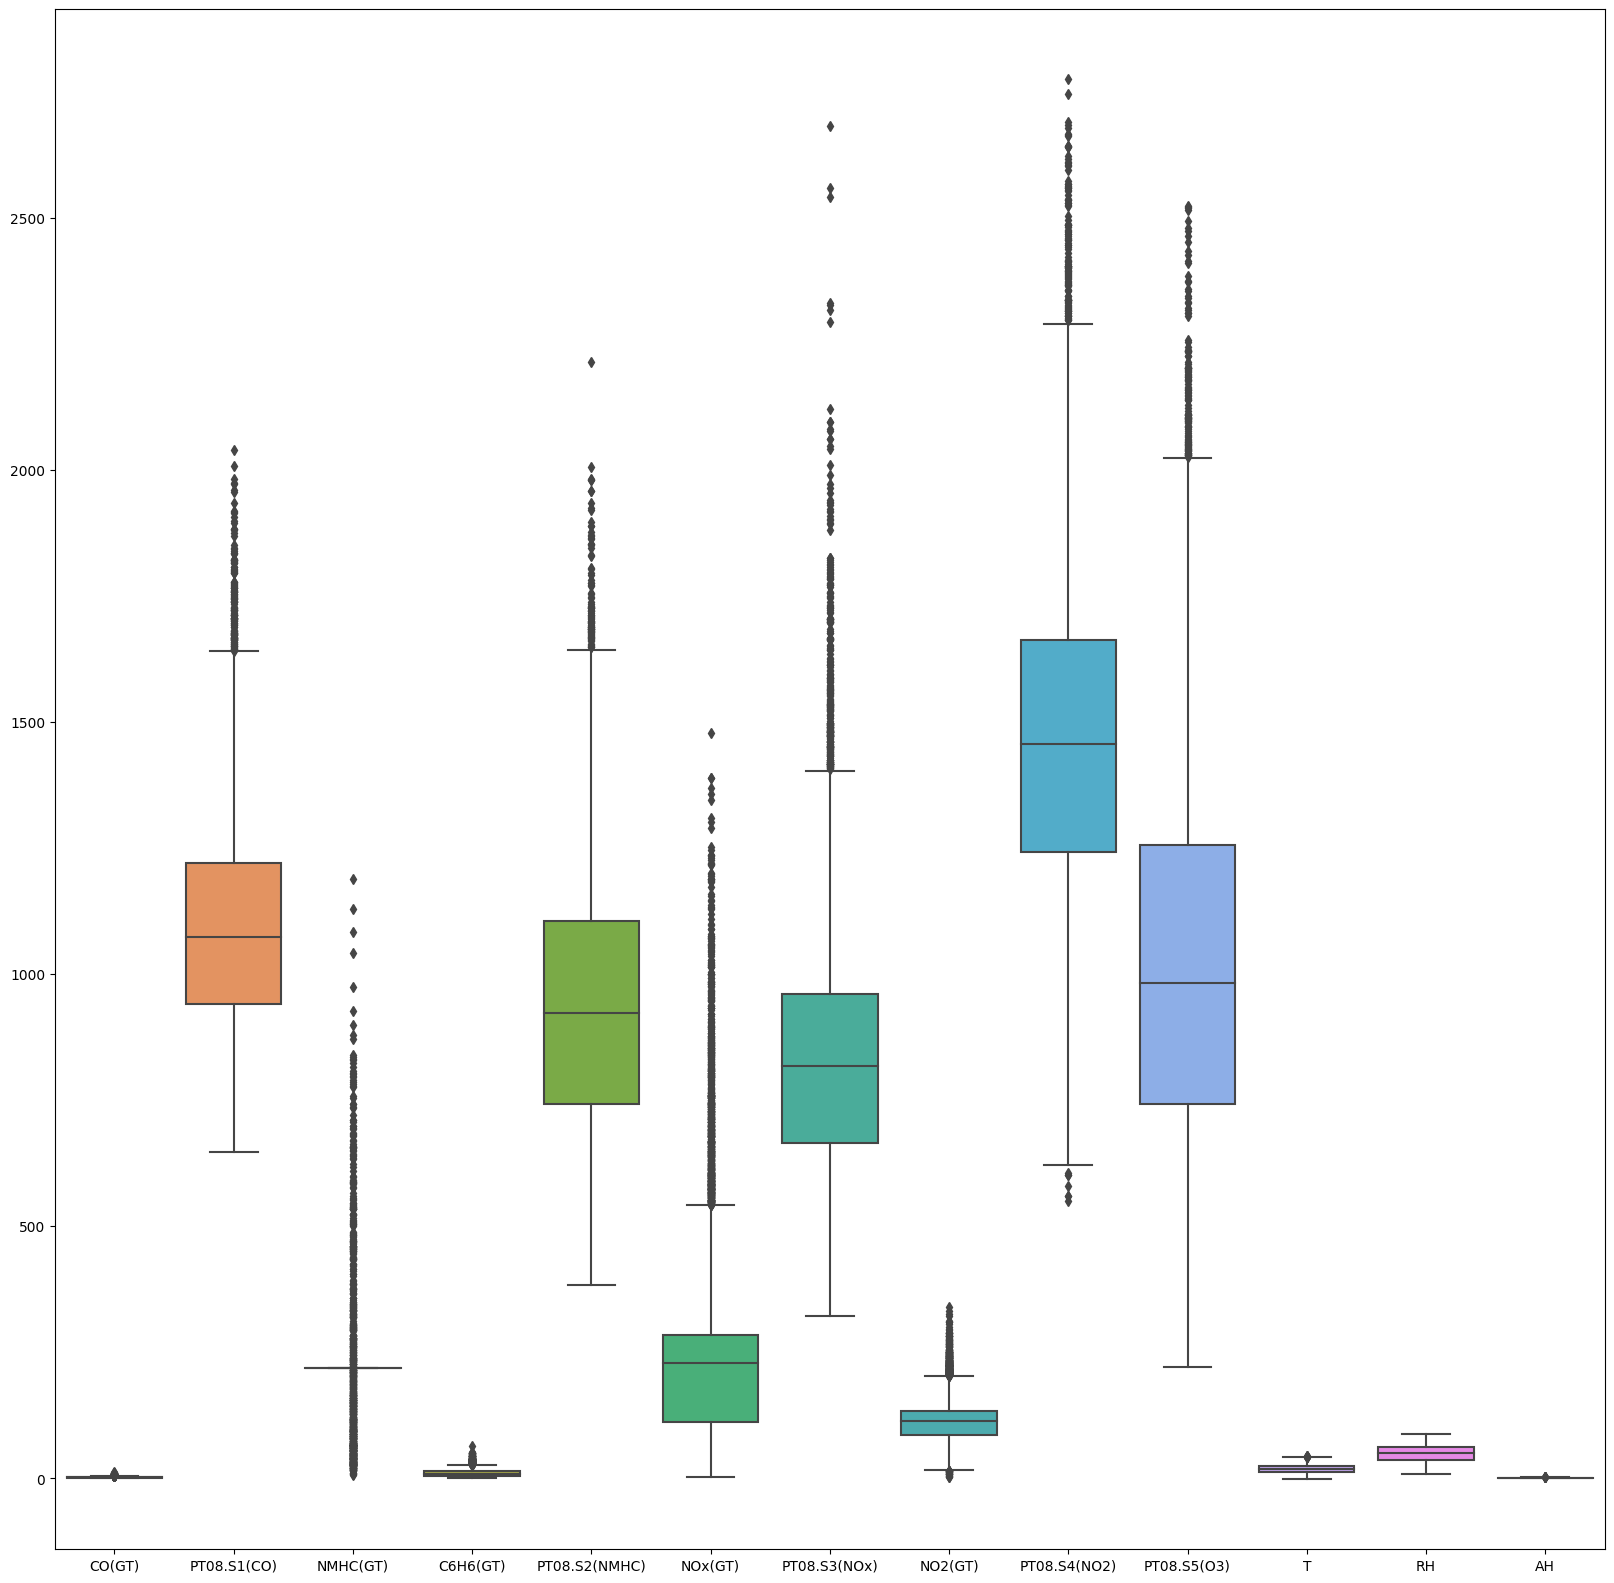

In [ ]:
plt.figure(figsize=(20, 20))
sns.boxplot(data = data)

## Features selection

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Select the features and the target variable
features = data.drop(columns=['CO(GT)','Date', 'Time'], axis=1)
target = data['CO(GT)']

# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Manual standarisation (inside Pandas DataFrame)
# the features will be rescaled to ensure the mean and the standard deviation to be 0 and 1, respectively
st_data = data.copy()
st_data = st_data.drop(columns=['Date', 'Time'])
st_data=(st_data-st_data.mean())/st_data.std()
st_data

In [ ]:
# Manual normalisation (inside Pandas DataFrame)
# re-scales features with a distribution value between 0 and 1. For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1
n_data = data.copy()
n_data = n_data.drop(columns=['Date', 'Time'])
n_data=(n_data-n_data.min())/(n_data.max() - n_data.min())
n_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.211864,0.511849,0.120981,0.184498,0.361737,0.111036,0.311024,0.328694,0.513040,0.454654,0.333333,0.499057,0.280046
1,0.161017,0.463196,0.088832,0.145428,0.312167,0.068382,0.360796,0.266509,0.453125,0.326382,0.326882,0.484287,0.264279
2,0.177966,0.542011,0.068528,0.139148,0.303701,0.087339,0.346500,0.331655,0.451214,0.370588,0.296774,0.563168,0.276374
3,0.177966,0.522980,0.061760,0.142780,0.308617,0.115098,0.326168,0.355345,0.464366,0.426741,0.277419,0.638906,0.294198
4,0.127119,0.448833,0.037225,0.100156,0.247030,0.087339,0.374034,0.337578,0.422212,0.386228,0.280645,0.633564,0.295215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,0.254237,0.478995,0.179198,0.210411,0.392189,0.318009,0.091708,0.556115,0.370166,0.654936,0.510753,0.252357,0.279592
9353,0.194915,0.370018,0.179198,0.176218,0.351632,0.237847,0.119348,0.524726,0.320369,0.455306,0.563978,0.182904,0.257621
9354,0.194915,0.355296,0.179198,0.192248,0.371023,0.197021,0.119136,0.511401,0.310139,0.378408,0.619355,0.115336,0.222820
9355,0.169492,0.255117,0.179198,0.147787,0.315308,0.157414,0.160754,0.455138,0.220324,0.238406,0.650000,0.054997,0.160865


In [ ]:
st_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03,9.357000e+03
mean,-1.214992e-17,7.593702e-17,-8.835131e-16,3.037481e-17,3.037481e-17,-8.504947e-17,-6.682458e-17,3.037481e-16,-2.429985e-17,-2.004737e-16,-8.504947e-17,1.063118e-16,-2.186986e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.559759e+00,-2.126251e+00,-3.316284e+00,-1.360353e+00,-2.124881e+00,-1.266063e+00,-2.039276e+00,-2.529555e+00,-2.667165e+00,-2.052643e+00,-2.334850e+00,-2.359882e+00,-2.124243e+00
25%,-7.239362e-01,-7.446464e-01,-8.899830e-16,-7.520052e-01,-7.513795e-01,-6.973511e-01,-6.747826e-01,-6.188758e-01,-6.324850e-01,-7.194681e-01,-7.265842e-01,-7.471503e-01,-7.058860e-01
50%,0.000000e+00,-1.184601e-01,-8.899830e-16,-2.039893e-01,-6.032778e-02,-9.244807e-02,-7.098930e-02,3.236279e-16,0.000000e+00,-1.031229e-01,-4.741570e-03,0.000000e+00,-2.548916e-02
75%,3.398383e-01,5.711671e-01,-8.899830e-16,4.865608e-01,6.335913e-01,1.929421e-01,4.960600e-01,4.537460e-01,6.065926e-01,5.951457e-01,6.651285e-01,7.448103e-01,6.838517e-01
max,7.406341e+00,4.417572e+00,1.518999e+01,7.347987e+00,4.874527e+00,6.370192e+00,7.338389e+00,5.160985e+00,3.886244e+00,3.840079e+00,3.035660e+00,2.326613e+00,3.045469e+00


In [ ]:
n_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,0.173962,0.324925,0.179198,0.156213,0.303580,0.165796,0.217461,0.328918,0.406989,0.348335,0.434754,0.503549,0.410902
std,0.111531,0.152816,0.054036,0.114832,0.142869,0.130954,0.106636,0.130030,0.152592,0.169701,0.186202,0.213379,0.193434
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.093220,0.211131,0.179198,0.069858,0.196231,0.074475,0.145505,0.248445,0.310477,0.226241,0.299462,0.344123,0.274359
50%,0.173962,0.306822,0.179198,0.132788,0.294961,0.153690,0.209891,0.328918,0.406989,0.330835,0.433871,0.503549,0.405971
75%,0.211864,0.412208,0.179198,0.212086,0.394101,0.191063,0.270359,0.387918,0.499550,0.449332,0.558602,0.662476,0.543182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Building the Model

In [ ]:
from sklearn.linear_model import LinearRegression
# https://scikit-learn.org/stable/supervised_learning.html

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

## Evaluating the Model

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Make predictions using the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error of the predictions
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.3338387325380897


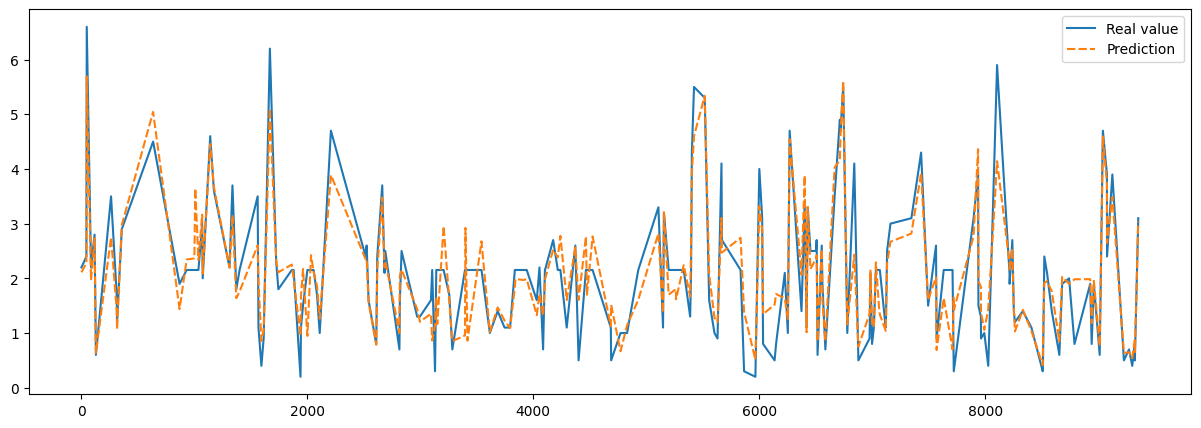

In [ ]:
res = pd.DataFrame()

res['Real value'] = y_test
res['Prediction'] = y_pred

plt.figure(figsize=(15,5))
sns.lineplot(data=res.iloc[:200,:])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error [MSE]:', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error [RMSE]:', rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error [MAE]:', mae)


Mean Squared Error [MSE]: 0.3338387325380897
Root Mean Squared Error [RMSE]: 0.577787791960067
Mean Absolute Error [MAE]: 0.39017827897154084


In [ ]:
# Sprobuj innego podzbioru kolumn

In [ ]:
# Uzyj innego modelu dostepnego w bibliotece sklearn (np. RandomForestRegressor)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html